In [ ]:
# day28_building a Pomodoro App_240802
# We need to learn Canvas Widget to put image on the screen
# Canvas Widget allows you to layer things one on top of the others.
# You could draw something and then you can draw something on top of that
# colorhunt

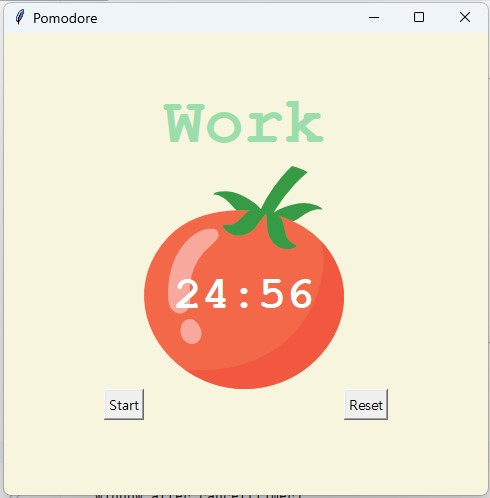

In [1]:
from PIL import Image
from IPython.display import display
img = Image.open('pompdore_240802.jpg')
display(img)

In [ ]:
from tkinter import *
import math

# ---------------------------- CONSTANTS ------------------------------- #
PINK = "#e2979c"
RED = "#e7305b"
GREEN = "#9bdeac"
YELLOW = "#f7f5dd"
FONT_NAME = "Courier"
WORK_MIN = 25
SHORT_BREAK_MIN = 5
LONG_BREAK_MIN = 20
reps = 0
timer = ""

# ---------------------------- TIMER RESET ------------------------------- # 


def reset_timer():
    global reps
    reps = 0
    window.after_cancel(timer)
    title_label.config(text="Timer")
    canvas.itemconfig(timer_text, text="00:00")
    check_marks.config(text="")


# ---------------------------- TIMER MECHANISM ------------------------------- # 

def start_timer():
    global reps
    work_sec = WORK_MIN*60
    short_break_sec = SHORT_BREAK_MIN*60
    long_break_sec = LONG_BREAK_MIN*60

    if reps % 2 == 0:
        title_label.config(text="Work", fg=GREEN)
        count_down(work_sec)
    elif reps == 7:
        title_label.config(text="Break", fg=PINK)
        count_down(long_break_sec)
    else:
        title_label.config(text="Break", fg=RED)
        count_down(short_break_sec)
    reps += 1


# ---------------------------- COUNTDOWN MECHANISM ------------------------------- # 

# GUI machanism is a little different with the internal function
# Event Driven
def count_down(count):
    count_min = count // 60
    count_sec = count % 60

    if count_sec < 10:  # type(count_sec) = int
        count_sec = f"0{count_sec}"  # type(count_sec) = str >> Dynamic typing
        # Dynamic Typing(동적타이핑): able to change a variable's data type by changing the content in the variable.
    # under two lines code are same
    # if count_sec < 10:
    #     count_sec = "0"+str(count_sec)

    canvas.itemconfig(timer_text, text=f"{count_min}:{count_sec}")

    if count > 0:
        global timer
        timer = window.after(1000, count_down, count-1)
    else:
        start_timer()
        marks = ""
        work_session = math.floor(reps/2)
        for _ in range(work_session):
            marks += "✓"
        check_marks.config(text=marks)

# ---------------------------- UI SETUP ------------------------------- #


window = Tk()
window.title("Pomodore")
window.config(padx=100, pady=50, bg=YELLOW)

# def say_something(a,b,c):
#     print(a)
#     print(b)
#     print(c)
# window.after(1000, say_something, "Hello", "hi", "wow")

canvas = Canvas(width=200, height=224, bg=YELLOW, highlightthickness=0)
tomato_img = PhotoImage(file="tomato.png")
canvas.create_image(100, 112, image=tomato_img)
timer_text = canvas.create_text(100, 130, text="00:00", fill="white", font=(FONT_NAME, 35, "bold"))
canvas.grid(column=1, row=1)


title_label = Label(text="Timer", fg=GREEN, bg=YELLOW, font=(FONT_NAME, 50, "bold"))
title_label.grid(column=1, row=0)


# timer_canvas = Canvas(width=200, height=100, bg=YELLOW, highlightthickness=0)
# timer_canvas.create_text(100, 50, text="Timer", fill=GREEN, font=(FONT_NAME, 50, "bold"))
# timer_canvas.grid(column=2, row=1)


start_button = Button(text="Start", highlightthickness=0, command=start_timer)
start_button.grid(column=0, row=2)

reset_button = Button(text="Reset", highlightthickness=0, command=reset_timer)
reset_button.grid(column=2, row=2)

check_marks = Label(text="", fg=GREEN, bg=YELLOW)
check_marks.grid(column=1, row=3)


window.mainloop()